# Python RegEx: практическое применение регулярок

Разберём регулярные выражения в Python, их синтаксис, популярные методы специального модуля re, а также попрактикуемся на задачах.

Рассмотрим регулярные выражения в Python, начиная синтаксисом и заканчивая примерами использования.



## Основы регулярных выражений

Регулярками в Python называются шаблоны, которые используются для поиска соответствующего фрагмента текста и сопоставления символов.

Грубо говоря, у нас есть input-поле, в которое должен вводиться email-адрес. Но пока мы не зададим проверку валидности введённого email-адреса, в этой строке может оказаться совершенно любой набор символов, а нам это не нужно.

Чтобы выявить ошибку при вводе некорректного адреса электронной почты, можно использовать следующее регулярное выражение:

r'^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+(?:\.[a-zA-Z0-9-]+)+$'

По сути, наш шаблон — это набор символов, который проверяет строку на соответствие заданному правилу. Давайте разберёмся, как это работает.

## Синтаксис RegEx

Синтаксис у регулярок необычный. Символы могут быть как буквами или цифрами, так и метасимволами, которые задают шаблон строки:

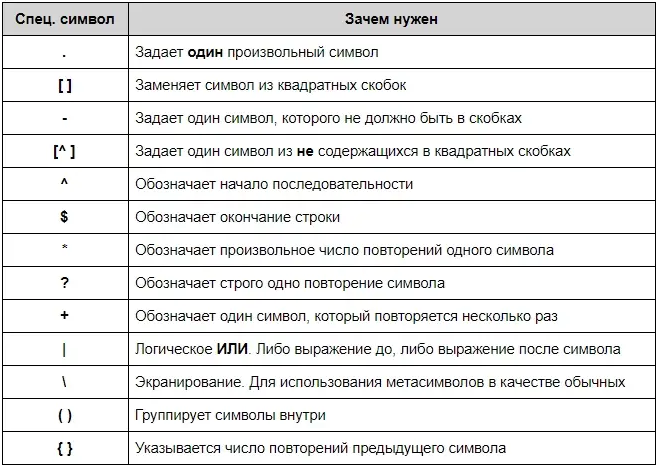

Также есть дополнительные конструкции, которые позволяют сокращать регулярные выражения:

- \d — соответствует любой одной цифре и заменяет собой выражение [0-9];
- \D — исключает все цифры и заменяет [^0-9];
- \w — заменяет любую цифру, букву, а также знак нижнего подчёркивания;
- \W — любой символ кроме латиницы, цифр или нижнего подчёркивания;
- \s — соответствует любому пробельному символу;
- \S — описывает любой непробельный символ.

## Для чего используются регулярные выражения

- для определения нужного формата, например телефонного номера или email-адреса;
- для разбивки строк на подстроки;
- для поиска, замены и извлечения символов;
- для быстрого выполнения нетривиальных операций.

Синтаксис таких выражений в основном стандартизирован, так что вам следует понять их лишь раз, чтобы использовать в любом языке программирования.

Примечание Не стоит забывать, что регулярные выражения не всегда оптимальны, и для простых операций часто достаточно встроенных в Python функций.

Хотите узнать больше? Обратите внимание на статью о регулярках для новичков.

## Регулярные выражения в Python

В Python для работы с регулярками есть модуль re. Его нужно просто импортировать:

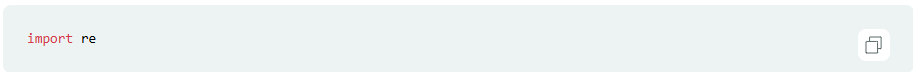

А вот наиболее популярные методы, которые предоставляет модуль:

- re.match()
- re.search()
- re.findall()
- re.split()
- re.sub()
- re.compile()

Рассмотрим каждый из них подробнее.

## re.match(pattern, string)

Этот метод ищет по заданному шаблону в начале строки. Например, если мы вызовем метод match() на строке «AV Analytics AV» с шаблоном «AV», то он завершится успешно. Но если мы будем искать «Analytics», то результат будет отрицательный:

In [5]:
import re
import pandas as pd
result = re.match(r'AV', 'AV Analytics Vidhya AV')
print(result)

<re.Match object; span=(0, 2), match='AV'>


Искомая подстрока найдена. Чтобы вывести её содержимое, применим метод group() (мы используем «r» перед строкой шаблона, чтобы показать, что это «сырая» строка в Python):

In [6]:
result = re.match(r'AV', 'AV Analytics Vidhya AV')
print(result.group(0))

AV


Теперь попробуем найти «Analytics» в данной строке. Поскольку строка начинается на «AV», метод вернет None:

In [7]:
result = re.match(r'Analytics', 'AV Analytics Vidhya AV')
print(result)

None


Также есть методы start() и end() для того, чтобы узнать начальную и конечную позицию найденной строки.

In [8]:
result = re.match(r'AV', 'AV Analytics Vidhya AV')
print(result.start())
print(result.end())

0
2


Эти методы иногда очень полезны для работы со строками.

## re.search(pattern, string)

Метод похож на match(), но ищет не только в начале строки. В отличие от предыдущего, search() вернёт объект, если мы попытаемся найти «Analytics»:

In [9]:
result = re.search(r'Analytics', 'AV Analytics Vidhya AV')
print(result.group(0))

Analytics


Метод search() ищет по всей строке, но возвращает только первое найденное совпадение.

## re.findall(pattern, string)

Возвращает список всех найденных совпадений. У метода findall() нет ограничений на поиск в начале или конце строки. Если мы будем искать «AV» в нашей строке, он вернет все вхождения «AV». Для поиска рекомендуется использовать именно findall(), так как он может работать и как re.search(), и как re.match().


In [10]:
result = re.findall(r'AV', 'AV Analytics Vidhya AV')
print(result)

['AV', 'AV']


## re.split(pattern, string, [maxsplit=0])

In [11]:
result = re.split(r'y', 'Analytics')
print(result)

['Anal', 'tics']


В примере мы разделили слово «Analytics» по букве «y». Метод split() принимает также аргумент maxsplit со значением по умолчанию, равным 0. В данном случае он разделит строку столько раз, сколько возможно, но если указать этот аргумент, то разделение будет произведено не более указанного количества раз. Давайте посмотрим на примеры Python RegEx:

In [12]:
result = re.split(r'i', 'Analytics Vidhya')
print(result)

['Analyt', 'cs V', 'dhya']


In [13]:
result = re.split(r'i', 'Analytics Vidhya',maxsplit=1)
print(result)

['Analyt', 'cs Vidhya']


Мы установили параметр maxsplit равным 1, и в результате строка была разделена на две части вместо трех.

## re.sub(pattern, repl, string)

Ищет шаблон в строке и заменяет его на указанную подстроку. Если шаблон не найден, строка остается неизменной.

In [14]:
result = re.sub(r'India', 'the World', 'AV is largest Analytics community of India')
print(result)


AV is largest Analytics community of the World


## re.compile(pattern, repl, string)

Мы можем собрать регулярное выражение в отдельный объект, который может быть использован для поиска. Это также избавляет от переписывания одного и того же выражения.

In [15]:
pattern = re.compile('AV')
result = pattern.findall('AV Analytics Vidhya AV')
print(result)
result2 = pattern.findall('AV is largest analytics community of India')
print(result2)

['AV', 'AV']
['AV']


До сих пор мы рассматривали поиск определенной последовательности символов. Но что, если у нас нет определенного шаблона, и нам надо вернуть набор символов из строки, отвечающий определенным правилам? Такая задача часто стоит при извлечении информации из строк. Это можно сделать, написав выражение с использованием специальных символов. Вот наиболее часто используемые из них:

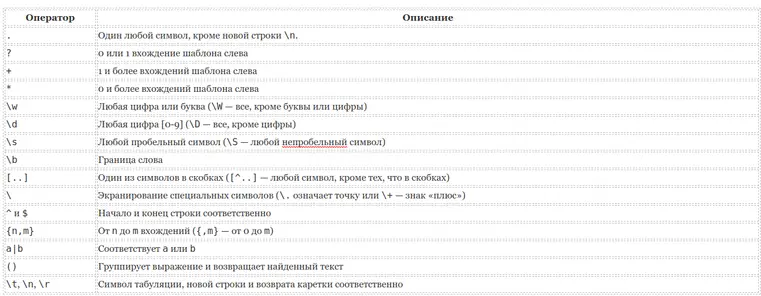

Больше информации по специальным символам можно найти в документации для регулярных выражений в Python 3.

Перейдём к практическому применению Python регулярных выражений и рассмотрим примеры.

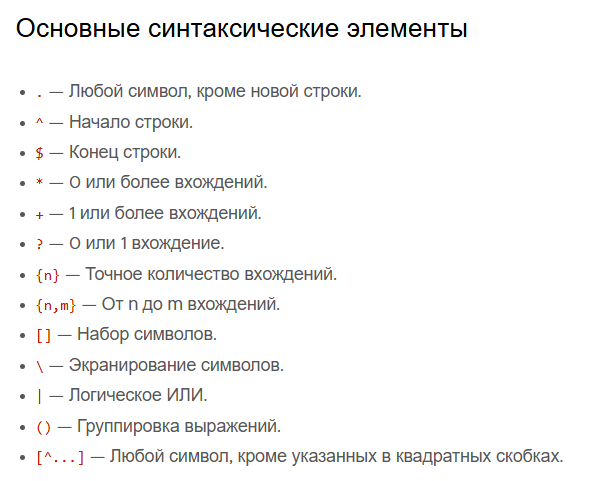
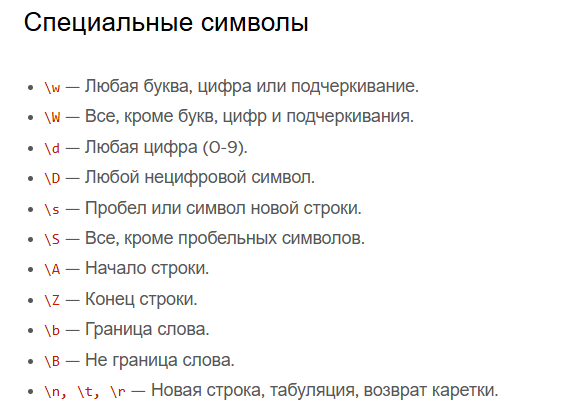
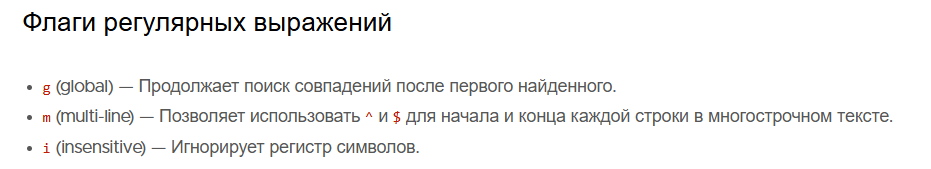